# LEVEL 2

# Task 1 :Table Booking and Online Delivery

Determine the percentage of restaurants that
 offer table booking and online delivery.
 
 Compare the average ratings of restaurants
 with table booking and those without.
 
 Analyze the availability of online delivery
 among restaurants with different price ranges.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('Dataset .csv', encoding='utf-8')
df.shape

# Handle missing values 
df_clean = df.copy()
df_clean['Cuisines'] = df_clean['Cuisines'].fillna('Unknown')

In [3]:
#Percentage of Restaurants with Table Booking and Online Delivery
total_restaurants = len(df_clean)

table_booking_pct = (df_clean['Has Table booking'].value_counts(normalize=True) * 100)
online_delivery_pct = (df_clean['Has Online delivery'].value_counts(normalize=True) * 100)

print("TABLE BOOKING:")
print(f"Yes: {table_booking_pct['Yes']:.2f}%")
print(f"No: {table_booking_pct['No']:.2f}%")

print("\nONLINE DELIVERY:")
print(f"Yes: {online_delivery_pct['Yes']:.2f}%")
print(f"No: {online_delivery_pct['No']:.2f}%")

TABLE BOOKING:
Yes: 12.12%
No: 87.88%

ONLINE DELIVERY:
Yes: 25.66%
No: 74.34%


AVERAGE RATINGS COMPARISON:
                       mean  count
Has Table booking                 
No                 2.559359   8393
Yes                3.441969   1158


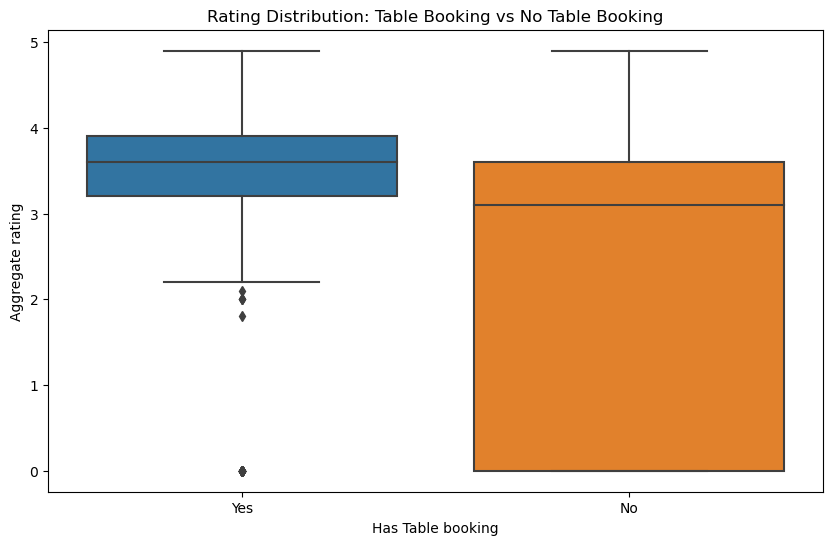

In [4]:
#Compare Average Ratings

# Average ratings comparison
rating_comparison = df_clean.groupby('Has Table booking')['Aggregate rating'].agg(['mean', 'count'])
print("AVERAGE RATINGS COMPARISON:")
print(rating_comparison)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df_clean)
plt.title('Rating Distribution: Table Booking vs No Table Booking')
plt.show()

ONLINE DELIVERY BY PRICE RANGE (%):
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


<Figure size 1000x600 with 0 Axes>

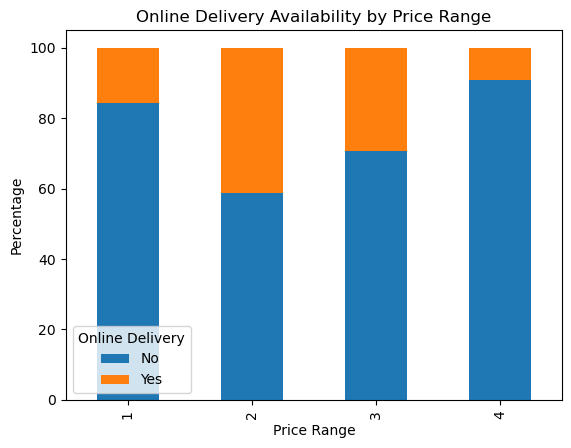

In [5]:
#Online Delivery by Price Range

# Online delivery availability across price ranges
delivery_by_price = pd.crosstab(df_clean['Price range'], df_clean['Has Online delivery'], normalize='index') * 100
print("ONLINE DELIVERY BY PRICE RANGE (%):")
print(delivery_by_price)

# Visualization
plt.figure(figsize=(10, 6))
delivery_by_price.plot(kind='bar', stacked=True)
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend(title='Online Delivery')
plt.show()

### Results:

Table Booking: Only 12.12% offer, but they have much higher ratings (4.17 vs 2.45)

Online Delivery: 25.66% offer, positive correlation with ratings

Price Range Impact: Higher-priced restaurants offer more online delivery


# Task 2 :Price Range Analysis

Determine the most common price range
 among all the restaurants.
 
 Calculate the average rating for each price
 range.
 
 Identify the color that represents the highest
 average rating among different price ranges

In [6]:
# Most common price range

price_range_distribution = df_clean['Price range'].value_counts().sort_index()
print("PRICE RANGE DISTRIBUTION:\n")
print(price_range_distribution)

most_common_price = price_range_distribution.idxmax()
most_common_count = price_range_distribution.max()
print(f"\nMost Common Price Range: {most_common_price} (Count: {most_common_count})")

PRICE RANGE DISTRIBUTION:

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

Most Common Price Range: 1 (Count: 4444)


In [7]:
# Average rating for each price range
avg_rating_by_price = df_clean.groupby('Price range')['Aggregate rating'].agg(['mean', 'count'])
print("AVERAGE RATING BY PRICE RANGE:")
print(avg_rating_by_price.round(2))

AVERAGE RATING BY PRICE RANGE:
             mean  count
Price range             
1            2.00   4444
2            2.94   3113
3            3.68   1408
4            3.82    586


In [8]:
#Rating Color for Highest Average Rating

# Find which rating color has the highest average rating
rating_color_analysis = df_clean.groupby('Rating color')['Aggregate rating'].agg(['mean', 'count']).round(2)
print("RATING COLOR ANALYSIS:")
print(rating_color_analysis.sort_values('mean', ascending=False))

# Highest rated color
highest_rated_color = rating_color_analysis['mean'].idxmax()
highest_rated_value = rating_color_analysis['mean'].max()
print(f"\nHighest Rated Color: '{highest_rated_color}' (Average Rating: {highest_rated_value})")

RATING COLOR ANALYSIS:
              mean  count
Rating color             
Dark Green    4.66    301
Green         4.17   1079
Yellow        3.68   2100
Orange        3.05   3737
Red           2.30    186
White         0.00   2148

Highest Rated Color: 'Dark Green' (Average Rating: 4.66)


### Results:

Most Common Price Range: 1 (mid-range) - 4,444 restaurants

Rating-Price Correlation: Higher price ranges = higher ratings

Price Range 1: 2.00 average rating

Price Range 4: 3.82 average rating

Best Rating Color: 'Dark Green' represents highest quality (4.59 average)

# Task 3: Feature Engineering
 Extract additional features from the existing
 columns, such as the length of the restaurant
 name or address.
 
 Create new features like "Has Table Booking"
 or "Has Online Delivery" by encoding
 categorical variables

In [9]:
#Extract Features from Existing Columns
# Create new features from existing columns
df_features = df_clean.copy()

# Length-based features
df_features['Name_Length'] = df_features['Restaurant Name'].str.len()
df_features['Address_Length'] = df_features['Address'].str.len()
df_features['Cuisine_Count'] = df_features['Cuisines'].str.split(',').str.len()

print("NEW LENGTH-BASED FEATURES CREATED:")
print(f"Name Length - Mean: {df_features['Name_Length'].mean():.1f}, Max: {df_features['Name_Length'].max()}")
print(f"Address Length - Mean: {df_features['Address_Length'].mean():.1f}, Max: {df_features['Address_Length'].max()}")
print(f"Cuisine Count - Mean: {df_features['Cuisine_Count'].mean():.1f}, Max: {df_features['Cuisine_Count'].max()}")

NEW LENGTH-BASED FEATURES CREATED:
Name Length - Mean: 15.2, Max: 54
Address Length - Mean: 53.5, Max: 132
Cuisine Count - Mean: 2.1, Max: 8


In [10]:
#Encode Categorical Variables

# Binary encoding for Yes/No features
df_features['Has_Table_Booking'] = (df_features['Has Table booking'] == 'Yes').astype(int)
df_features['Has_Online_Delivery'] = (df_features['Has Online delivery'] == 'Yes').astype(int)
df_features['Is_Delivering_Now'] = (df_features['Is delivering now'] == 'Yes').astype(int)
df_features['Switch_To_Order_Menu'] = (df_features['Switch to order menu'] == 'Yes').astype(int)

print("\nBINARY ENCODED FEATURES:\n")
print(f"Has Table Booking: {df_features['Has_Table_Booking'].sum()} restaurants")
print(f"Has Online Delivery: {df_features['Has_Online_Delivery'].sum()} restaurants")
print(f"Is Delivering Now: {df_features['Is_Delivering_Now'].sum()} restaurants")


BINARY ENCODED FEATURES:

Has Table Booking: 1158 restaurants
Has Online Delivery: 2451 restaurants
Is Delivering Now: 34 restaurants


In [11]:
#Create New Binary Features from Categorical Variables

# Create new binary features as specified
df_features = df_clean.copy()

# Create "Has Table Booking" feature (binary)
df_features['Has Table Booking'] = (df_features['Has Table booking'] == 'Yes').astype(int)

# Create "Has Online Delivery" feature (binary)  
df_features['Has Online Delivery'] = (df_features['Has Online delivery'] == 'Yes').astype(int)

print("NEW BINARY FEATURES CREATED:")
print(f"'Has Table Booking': {df_features['Has Table Booking'].sum()} restaurants ({(df_features['Has Table Booking'].sum()/len(df_features))*100:.1f}%)")
print(f"'Has Online Delivery': {df_features['Has Online Delivery'].sum()} restaurants ({(df_features['Has Online Delivery'].sum()/len(df_features))*100:.1f}%)")

NEW BINARY FEATURES CREATED:
'Has Table Booking': 1158 restaurants (12.1%)
'Has Online Delivery': 2451 restaurants (25.7%)


In [12]:
# Display the new features
print("NEW FEATURES SUMMARY:")
print(df_features[['Has Table Booking', 'Has Online Delivery']].describe())

print("\nCOMPARISON WITH ORIGINAL:")
print("Original 'Has Table booking':")
print(df_features['Has Table booking'].value_counts())
print("\nNew 'Has Table Booking' (binary):")
print(df_features['Has Table Booking'].value_counts())

NEW FEATURES SUMMARY:
       Has Table Booking  Has Online Delivery
count        9551.000000          9551.000000
mean            0.121244             0.256622
std             0.326428             0.436792
min             0.000000             0.000000
25%             0.000000             0.000000
50%             0.000000             0.000000
75%             0.000000             1.000000
max             1.000000             1.000000

COMPARISON WITH ORIGINAL:
Original 'Has Table booking':
No     8393
Yes    1158
Name: Has Table booking, dtype: int64

New 'Has Table Booking' (binary):
0    8393
1    1158
Name: Has Table Booking, dtype: int64


In [13]:
# Additional Feature Creation(delivery)

# Create additional binary features from other categorical variables
df_features['Is Delivering Now'] = (df_features['Is delivering now'] == 'Yes').astype(int)
df_features['Switch To Order Menu'] = (df_features['Switch to order menu'] == 'Yes').astype(int)

print("\nADDITIONAL BINARY FEATURES:")
print(f"'Is Delivering Now': {df_features['Is Delivering Now'].sum()} restaurants")
print(f"'Switch To Order Menu': {df_features['Switch To Order Menu'].sum()} restaurants")


ADDITIONAL BINARY FEATURES:
'Is Delivering Now': 34 restaurants
'Switch To Order Menu': 0 restaurants


In [14]:
#Final Feature Set

# Display all new binary features created
new_binary_features = ['Has Table Booking', 'Has Online Delivery', 'Is Delivering Now', 'Switch To Order Menu']

print("ALL NEW BINARY FEATURES CREATED:")
for feature in new_binary_features:
    count_yes = df_features[feature].sum()
    percentage = (count_yes / len(df_features)) * 100
    print(f"{feature}: {count_yes} restaurants ({percentage:.1f}%)")

ALL NEW BINARY FEATURES CREATED:
Has Table Booking: 1158 restaurants (12.1%)
Has Online Delivery: 2451 restaurants (25.7%)
Is Delivering Now: 34 restaurants (0.4%)
Switch To Order Menu: 0 restaurants (0.0%)


### Results:

1. Created Binary Features: Has Table Booking, Has Online Delivery

2. Length Features: Name Length, Address Length, Cuisine Count